   1. Which Movie has highest popularity 
   <br>
   2. Top 10 highest popular movie
   <br>
   3. What kinds of properties are associated with movie with highest popularity movie.
   <br>
   4. Top 10 Movie Director
   <br>
   5. Top 5 Movie Production Company
   <br>
   6. Which year has highest number of movie released
   <br>
   7. Which Genres are most popular from year to year
   <br>
   8. Movie with highest Revenue
   <br>
   9. Movie with highest Budget
   <br>
   10. The movies with highest loss
   <br>
   11. Does budget affect revenue?

In [115]:
#Import the libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [116]:
#read data
df = pd.read_csv("tmdb-movies.csv")

In [117]:
#view the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling

In [118]:
#veiw the shape of the data which consiste of the rows and columns
print(f"The data has {df.shape[0]} rows, and {df.shape[1]} columns")

The data has 10866 rows, and 21 columns


In [119]:
#View the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [120]:
#To view the statistical values of numeric columns in our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Based on my research questions, I'll be dropping some columns that wouldn't have any effect on my research questions

In [121]:
#drop irrelevant columns
df.drop(columns = ['id', 'runtime', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'], inplace =True)

In [8]:
#rename 'original_title' to 'title'
df.rename(columns = {'original_title': 'title'}, inplace=True)

In [122]:
#view first row to see if the colums have been effected
df.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [123]:
#check the new shape after dropping and renaming columns
df.shape

(10866, 12)

In [124]:
#check for duplicates
df.duplicated().sum()

1

In [12]:
#drop the duplicate
df.drop_duplicates(inplace=True)

In [13]:
#recheck for duplicated after dropping
df.duplicated().sum()

0

We have no more duplicate

In [14]:
#check for missing values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
title                      0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [15]:
df.cast.mode()[0], df.director.mode()[0], df.genres.mode()[0]

('Louis C.K.', 'Woody Allen', 'Comedy')

In [16]:
#replace the missing value in director, cast, and genre column with mode
df.director.fillna(df.director.mode()[0], inplace=True)
df.cast.fillna("Missing", inplace=True)
df.production_companies.fillna("Missing", inplace=True)


In [17]:
#drop genre missing values
df.dropna(subset= 'genres', inplace=True)

. I couldn't fill cast with mode because diffrent casts are stacked together
<br>
. I dropped genres missing value rows since it just 23 and can't really affect my analysis
<br>
. I can't drop the production companies because of the numbers. It will affect my analysis and I can't replace with mode as well. So I replaced the row with missing


In [18]:
#check if missing values has been effected
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
title                   0
cast                    0
director                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [19]:
#check for inconsistent data type
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
title                    object
cast                     object
director                 object
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [20]:
df.head(1)

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [21]:
#convert release_date odject type to datetime
df.release_date = pd.to_datetime(df.release_date)

In [22]:
#recheck if modified
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
title                           object
cast                            object
director                        object
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [23]:
df.head(2)

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


## EDA - Exploratory Data Analysis

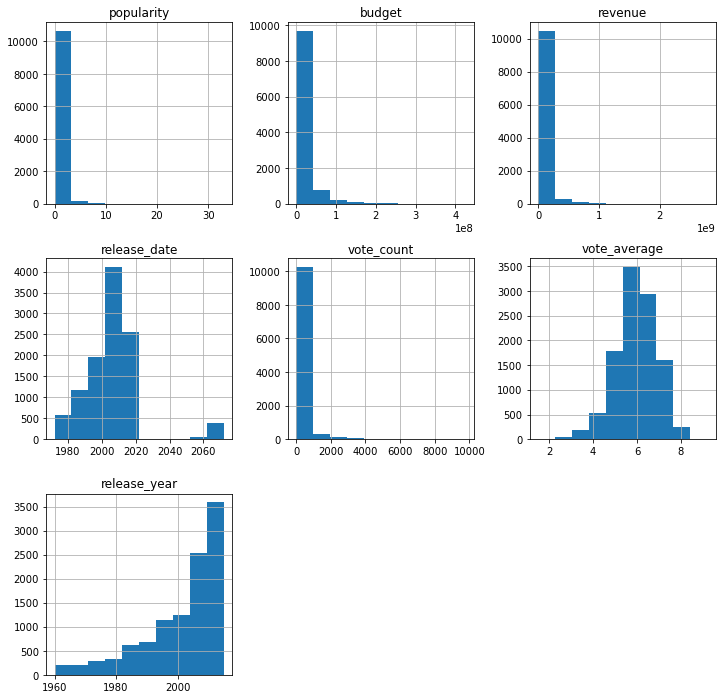

In [24]:
df.hist(figsize = (12, 12));

In [25]:
#check the begining and the end of the release year
df.release_year.min(), df.release_year.max()

(1960, 2015)

The release_date bar chart shows an abnomality in the date. The release year is from 1960 - 2015. How do we have year 2040 upward in release_date.
<br>
Check what the problem is

In [26]:
#fetch the data greater than year 2015
mask = df['release_date'] > '2015-12-31'
mask = df.loc[mask]

In [27]:
mask[['release_date', 'release_year']].head()

,release_date,release_year
9719,2068-04-05,1968
9720,2068-02-07,1968
9721,2068-10-01,1968
9722,2068-10-08,1968
9723,2068-10-10,1968


There's an error in the first 2 numbers of year. We can say that the release_year is the correct year
<br>
We have to replace the year in release_date with release_year

In [28]:
#check the size of the abnormal year
mask.shape

(457, 12)

We have 457 rows that are affected by the wrong release_date year

In [29]:
#replace the year in release_date with release_year
df['new_release_date'] = df.apply(lambda x : x.release_date.replace(year=x.release_year),axis=1)

In [30]:
df.head()

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,2015-06-09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2015-05-13
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,2015-03-18
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2015-12-15
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2015-04-01


Drop the 'release_date', since we already have a corrected 'release_date' as 'new_release_date'

In [31]:
df.drop(columns = 'release_date', inplace=True)

#### Perform hist plot again to view

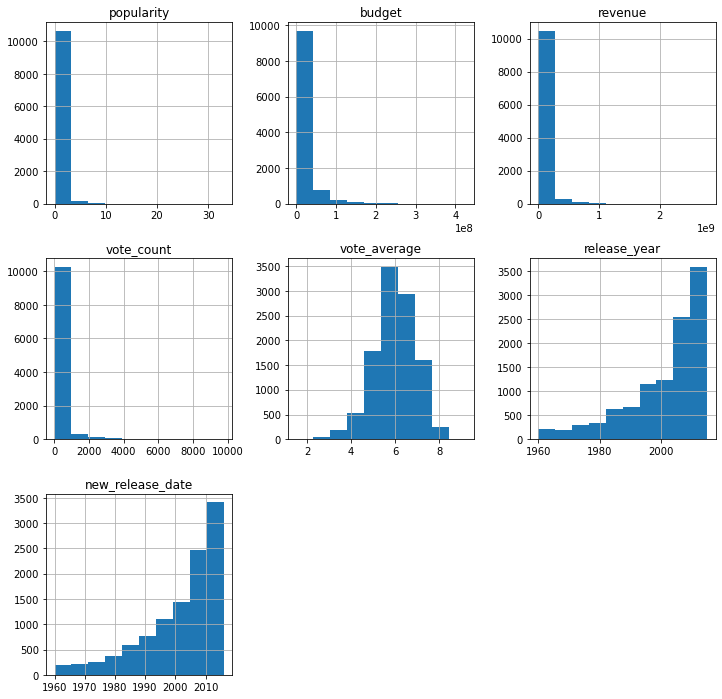

In [32]:
df.hist(figsize = (12, 12));

The historam plot is clean

In [33]:
df.head(2)

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,2015-05-13


### Q1. Which Movie has highest popularity

In [34]:
pop = df['popularity'].max()


In [35]:
#pop = (df.title[df.popularity == pop].values[0], pop)

In [36]:
pop

32.985763

In [37]:
print(f"The Movie titled: [{df.title[df.popularity == pop].values[0]}], has the highest popularity with [{pop}]")

The Movie titled: [Jurassic World], has the highest popularity with [32.985763]


In [38]:
#(df.original_title[df.budget == df.budget.max()].values[0], df.budget.max() , df.revenue[df.budget == df.budget.max()].values[0])

### Q2. Top 10 highest popular movie

In [39]:
#df.groupby(["title", "revenue"])["popularity"].sum().sort_values(ascending=False).head(10)

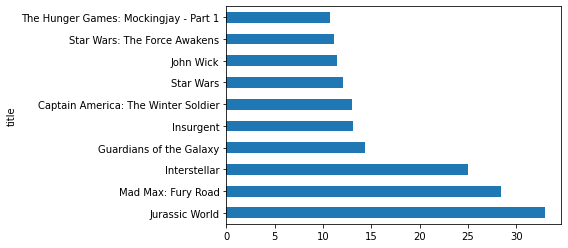

In [40]:

Pop_Top_10 = df.groupby('title')['popularity'].sum().sort_values(ascending=False).head(10)
#get the top 10 movies with highest popularity
#Pop_Top_10 = df.sort_values('popularity', ascending=False)
#fetch just the 'title', and the 'popularity'
#Pop_Top_10 = Pop_Top_10[['title', 'popularity']].head(10)
#Pop_Top_10.groupby('title')['popularity'].sum()

Pop_Top_10.plot(kind = 'barh');

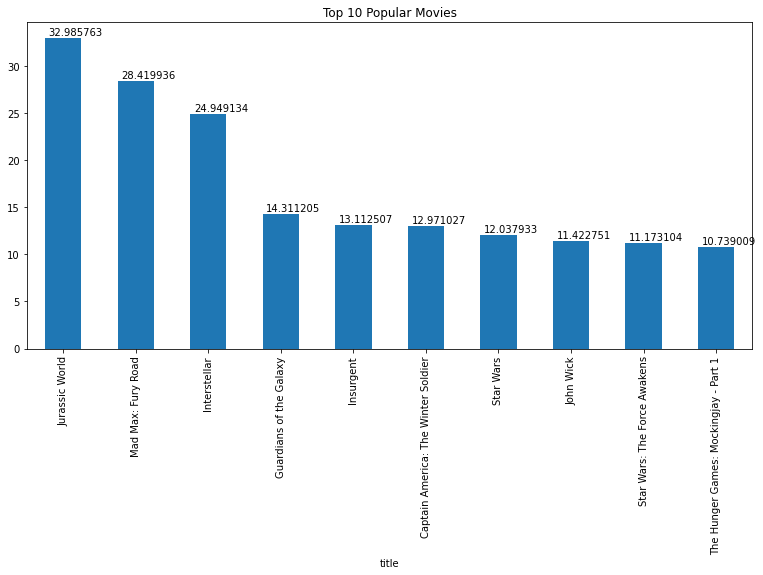

In [41]:
Plot = Pop_Top_10.plot.bar(figsize=(13,6));
for p in Plot.patches:
    Plot.annotate(p.get_height(), (p.get_x() + (p.get_width()/10), p.get_height()+0.3))
plt.title("Top 10 Popular Movies");

### Q3. What kinds of properties are associated with movie with highest popularity movie

In [42]:
Prop_Top_10 = df.sort_values('popularity', ascending=False)

In [43]:
# Correlation matrix
#corr = df_original.corr()

#plt.figure (figsize=(15,15))
#ax = sns.heatmap(corr, annot = True, cmap = 'coolwarm')

#ax.set_title("General Corrolation",fontsize=13)
#plt.savefig('df_original corr.jpg')

Text(0.5, 1.0, 'Data Correlation')

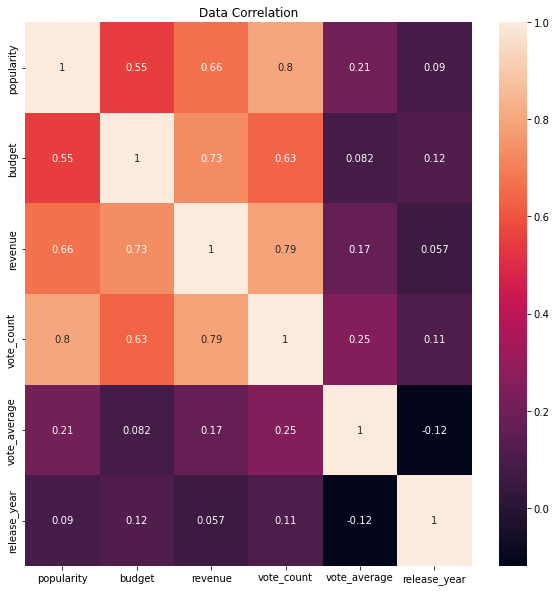

In [44]:
# calculate the correlation matrix
corr = Prop_Top_10.corr()

# plot the heatmap
plt.figure (figsize=(10,10))
ax = sns.heatmap(corr, annot = True)
ax.set_title("Data Correlation")

What kinds of properties are associated with movie with highest popularity movie

From the heatmap correlation, the number of votes, and revenue generated strongly influenced the popularity of the top movies.
Budget is in a average. High budget doesn't necessary mean a movie will be popular.


## 4. Top 10 Movie Director

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10842 non-null  float64       
 1   budget                10842 non-null  int64         
 2   revenue               10842 non-null  int64         
 3   title                 10842 non-null  object        
 4   cast                  10842 non-null  object        
 5   director              10842 non-null  object        
 6   genres                10842 non-null  object        
 7   production_companies  10842 non-null  object        
 8   vote_count            10842 non-null  int64         
 9   vote_average          10842 non-null  float64       
 10  release_year          10842 non-null  int64         
 11  new_release_date      10842 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.1+ M

In [46]:
df.director.nunique()

5056

In [47]:
#df.groupby('director')['director'].value_counts().sort_values(ascending=False).head(10)

In [48]:
#df.groupby('director')['director'].value_counts().sort_values(ascending=False).head(10)

In [49]:
director_count = df.director.value_counts()[:10].sort_values(ascending=False)
director_count

Woody Allen          87
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

In [50]:
#check if the number of director counts is equal to the list of directors in our dataset
director_count.sum() == df.director.value_counts().sum()

False

<AxesSubplot:>

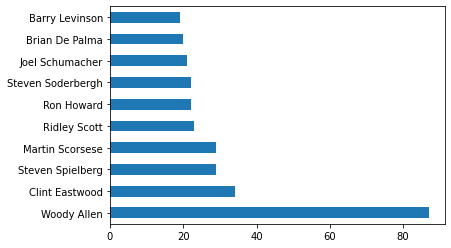

In [51]:
#plot bar chart for the top directors influenced by the numbers of the movies directed
director_count.head(10).plot(kind="barh")

In [52]:
#df[df["director"].str.contains('|')]

## 5. Top 5 Movie Production Company

In [53]:
#check how many rows has "|"
df[df["production_companies"].str.contains('|')].shape[0]

10842

Apparently, it happens that all the rows has " | "

In [54]:
#split the companies and pass them into a new dataframe
prod_comp = pd.DataFrame(df['production_companies'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
prod_comp

Missing                                   1016
Universal Pictures                         522
Warner Bros.                               509
Paramount Pictures                         431
Twentieth Century Fox Film Corporation     282
                                          ... 
Harbour Productions Limited                  1
Harbour Pictures                             1
Harbor Picture Company                       1
Harbor Light Entertainment                   1
í”„ë¡œë•ì…˜M                                 1
Length: 7875, dtype: int64

In [55]:
#get the top 5 movie production Company based on the number of movies produced
#I removed the index 0 being the missing values
prod_comp[1:6]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
dtype: int64

## 6. Which year has highest number of movies

In [56]:
df.head()

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,2015-05-13
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,2015-03-18
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,2015-12-15
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,2015-04-01


In [57]:
top_year = df.release_year.value_counts()[:1]

In [58]:
print(f"The year [{top_year.index[0]}] has the highest number of movies released, with [{top_year.iloc[0]}] movies")

The year [2014] has the highest number of movies released, with [699] movies


## 7. Movie with highest Revenue

In [105]:
highest_rev = df.revenue.max()
print(f"Movie [{df.title[df.revenue == highest_rev ].values[0]}] has the highest revenue 0f [{highest_rev}]")

Movie [Avatar] has the highest revenue 0f [2781505847]


## 8. Movie with highest Budget

In [104]:
highest_budg = df.budget.max()
print(f"Movie [{df.title[df.budget == highest_budg ].values[0]}] has the highest budget 0f [{highest_budg}]")

Movie [The Warrior's Way] has the highest budget 0f [425000000]


In [109]:
df.head()

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date,profit,profit (%)
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09,1363528810,9.910614
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,2015-05-13,228436354,39.636784
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,2015-03-18,185238201,37.258051
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,2015-12-15,1868178225,9.670346
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,2015-04-01,1316249360,12.614113


## 9. The movies with highest loss


In [112]:
#Getting the difference between revenue and budget, then create a new column for the result, called 'profit'
df['profit'] = df.revenue - df.budget

In [108]:
#get the value of the highest
df.profit.min()

-413912431

In [114]:
#The movie with highest loss
print(f"The movie [{df.title[df.profit == -413912431].values[0]}] has the highest loss with [${-413912431}]")
print(f"It's budget is [${df.budget[df.profit == -413912431].values[0]}], and the revenue is [${df.revenue[df.profit == -413912431].values[0]}]")
print("That's a great loss")

The movie [The Warrior's Way] has the highest loss with [$-413912431]
It's budget is [$425000000], and the revenue is [$11087569]
That's a great loss


## 10. Does budget affect revenue?

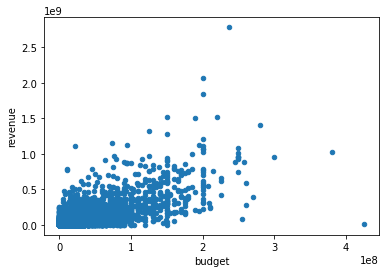

In [103]:
#scattered plot of budget agains revenue
df.plot(kind='scatter', x = 'budget', y ='revenue');

We can say that high budget in a way affects revenue positively